In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [59]:
from sklearn import preprocessing

from sklearn.model_selection import train_test_split

from imblearn.pipeline import pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek, SMOTEENN

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, KFold

from sklearn.metrics import make_scorer, classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, roc_auc_score



In [3]:
df = pd.read_csv('Preprocessed_Data.csv')
df.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,No of months in current residence,No of months in current company,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,...,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession_SE,Profession_SE_PROF,Residence_Living with Parents,Residence_Others,Residence_Owned,Residence_Rented
0,954457215,48,0,1,2.0,40.0,113,56,0,0,...,0,0,0,0,0,0,0,0,0,1
1,432830445,31,1,1,4.0,55.0,112,46,0,0,...,0,0,0,1,0,1,0,0,0,1
2,941387308,32,1,0,2.0,46.0,104,49,0,0,...,0,0,0,0,0,1,0,0,0,1
3,392161677,43,1,1,1.0,53.0,94,53,0,0,...,0,0,0,0,1,0,0,0,0,1
4,182011211,35,0,1,5.0,44.0,112,43,0,0,...,0,0,0,1,0,0,0,0,0,1


In [178]:
# df_cat = df.select_dtypes(include='object')
# df_cat.columns

In [179]:
# le = preprocessing.LabelEncoder()
# df_cat = df_cat.apply(le.fit_transform)
# df_cat.head()

In [180]:
# df = df.drop(df_cat.columns, axis=1)
# df = pd.concat([df, df_cat], axis=1)
# df.head()

In [4]:
df[df.columns] = df[df.columns].astype('int64')

In [5]:
df['Performance Tag'] = df['Performance Tag'].astype('category')

In [6]:
df['Performance Tag'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [7]:
#df['Performance Tag'] = df['Performance Tag'].astype('category')

In [8]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [9]:
y_test = df_test['Performance Tag']
X_test = df_test.loc[:, ~df_test.columns.isin(['Performance Tag'])]

In [10]:
y_train = df_train['Performance Tag']
X_train = df_train.loc[:, ~df_train.columns.isin(['Performance Tag'])]

In [11]:
X_train.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,No of months in current residence,No of months in current company,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,...,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession_SE,Profession_SE_PROF,Residence_Living with Parents,Residence_Others,Residence_Owned,Residence_Rented
19832,405620291,45,1,1,1,49,6,3,0,0,...,0,0,0,1,0,0,0,0,0,1
44286,148002169,49,1,1,2,37,120,12,0,0,...,1,0,0,0,0,1,0,0,0,1
6912,989348714,55,1,1,1,23,101,33,0,0,...,1,0,0,0,0,0,0,0,0,1
43159,526701605,57,1,1,5,4,18,56,0,0,...,0,0,0,0,0,1,0,0,0,1
38408,427666127,41,1,1,3,53,26,3,0,0,...,0,0,0,1,0,0,0,0,0,1


In [12]:
len(X_train)

54828

In [13]:
X_train = X_train.drop('Application ID', axis=1)

In [14]:
col = X_train.columns

In [15]:
X_train.dtypes

Age                                                                int64
Gender                                                             int64
Marital Status (at the time of application)                        int64
No of dependents                                                   int64
Income                                                             int64
No of months in current residence                                  int64
No of months in current company                                    int64
No of times 90 DPD or worse in last 6 months                       int64
No of times 60 DPD or worse in last 6 months                       int64
No of times 30 DPD or worse in last 6 months                       int64
No of times 90 DPD or worse in last 12 months                      int64
No of times 60 DPD or worse in last 12 months                      int64
No of times 30 DPD or worse in last 12 months                      int64
Avgas CC Utilization in last 12 months             

In [16]:
X_train.memory_usage().sum()/1024**2

14.640655517578125

In [17]:
X_train.max()

Age                                                                     65
Gender                                                                   1
Marital Status (at the time of application)                              1
No of dependents                                                         5
Income                                                                  60
No of months in current residence                                      126
No of months in current company                                        133
No of times 90 DPD or worse in last 6 months                             3
No of times 60 DPD or worse in last 6 months                             5
No of times 30 DPD or worse in last 6 months                             7
No of times 90 DPD or worse in last 12 months                            5
No of times 60 DPD or worse in last 12 months                            7
No of times 30 DPD or worse in last 12 months                            9
Avgas CC Utilization in l

In [18]:
#int_big = ['Outstanding Balance']

In [19]:
#int_small = X_train.columns[~X_train.columns.isin(int_big)]

In [195]:
# int_small = ['Age', 'No of dependents', 'Income', 'No of months in current residence', 'No of months in current company', 'No of times 90 DPD or worse in last 6 months', 'No of times 60 DPD or worse in last 6 months', 'No of times 30 DPD or worse in last 6 months', 'No of times 90 DPD or worse in last 12 months', 'No of times 60 DPD or worse in last 12 months', 'No of times 30 DPD or worse in last 12 months', 'Avgas CC Utilization in last 12 months', 'No of trades opened in last 6 months', 'No of trades opened in last 12 months', 'No of PL trades opened in last 6 months', 'No of PL trades opened in last 12 months', 'No of Inquiries in last 6 months (excluding home & auto loans)', 'No of Inquiries in last 12 months (excluding home & auto loans)', 'Presence of open home loan', 'Total No of Trades', 'Presence of open auto loan', 'Gender', 'Marital Status (at the time of application)', 'Education', 'Profession', 'Type of residence']

In [20]:
#X_train[int_small] = X_train[int_small].astype('uint8')

In [21]:
#X_train[int_big] = X_train[int_big].astype('uint32')

In [22]:
#X_train.dtypes

In [199]:
#X_train.memory_usage().sum()/1024**2

2.3529624938964844

In [23]:
#X_train.max()

In [24]:
sum(y_train)

2317

In [25]:
len(y_train)

54828

In [26]:
rfc = RandomForestClassifier()

In [204]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [205]:
y_pred_default = rfc.predict(X_test[col])

In [206]:
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     13112
         1.0       0.00      0.00      0.00       596

    accuracy                           0.96     13708
   macro avg       0.48      0.50      0.49     13708
weighted avg       0.91      0.96      0.94     13708



In [207]:
confusion_matrix(y_test, y_pred_default)

array([[13111,     1],
       [  596,     0]], dtype=int64)

Random Forest with Upsample

In [27]:
sm = SMOTE(random_state=100)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [28]:
len(y_train_sm)

105022

In [29]:
sum(y_train_sm)

52511

In [30]:
rfc.fit(X_train_sm, y_train_sm)

RandomForestClassifier()

In [31]:
y_pred_sm = rfc.predict(X_test[col])

In [32]:
print(classification_report(y_test, y_pred_sm))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     13134
           1       0.07      0.07      0.07       574

    accuracy                           0.92     13708
   macro avg       0.51      0.51      0.51     13708
weighted avg       0.92      0.92      0.92     13708



In [33]:
confusion_matrix(y_test, y_pred_sm)

array([[12607,   527],
       [  535,    39]], dtype=int64)

In [39]:
n_folds = 5

rf = RandomForestClassifier()

scorer = {
    #'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score)
    #'recall' : make_scorer(recall_score)
    }

#imba_pipeline = make_pipeline(SMOTE(random_state=100), rf)
imba_pipeline = make_pipeline(SMOTEENN(random_state=42), rf)

rf_param = 'randomforestclassifier__'

In [40]:
# Max Depth

parameters = {rf_param + 'max_depth' : [5,25,50]}

rf_depth = GridSearchCV(imba_pipeline,
                        parameters,
                        cv = n_folds,
                        scoring=scorer,
                        refit='f1',
                        return_train_score=True)
rf_depth.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smoteenn', SMOTEENN(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__max_depth': [5, 25, 50]},
             refit='f1', return_train_score=True,
             scoring={'f1': make_scorer(f1_score)})

In [41]:
scores = pd.DataFrame(rf_depth.cv_results_)
scores.sort_values('rank_test_f1').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,...,mean_test_f1,std_test_f1,rank_test_f1,split0_train_f1,split1_train_f1,split2_train_f1,split3_train_f1,split4_train_f1,mean_train_f1,std_train_f1
0,196.584445,7.419916,0.106507,0.003311,5,{'randomforestclassifier__max_depth': 5},0.114071,0.114326,0.127201,0.120516,...,0.118803,0.004831,1,0.118239,0.122754,0.117918,0.120778,0.120866,0.120111,0.001806
1,196.500823,3.977787,0.269877,0.011361,25,{'randomforestclassifier__max_depth': 25},0.095929,0.087607,0.107579,0.091723,...,0.094026,0.007472,2,0.382422,0.369137,0.362328,0.387387,0.377991,0.375853,0.009042
2,200.771771,8.628142,0.277654,0.010592,50,{'randomforestclassifier__max_depth': 50},0.090036,0.094199,0.115265,0.082734,...,0.093005,0.011963,3,0.409692,0.393494,0.385893,0.421194,0.409419,0.403938,0.012615


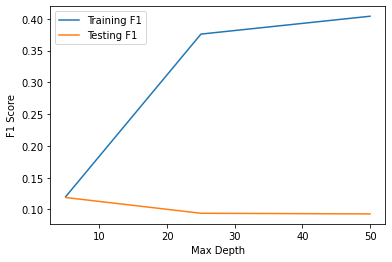

In [42]:
plt.figure()

plt.plot(scores['param_randomforestclassifier__max_depth'],
         scores['mean_train_f1'],
         label='Training F1')
plt.plot(scores['param_randomforestclassifier__max_depth'],
         scores['mean_test_f1'],
         label='Testing F1')

plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')

plt.show()

In [49]:
rf_depth.score(X_test[col], y_test)

0.12305555555555557

In [50]:
recall_score(y_test, rf_depth.predict(X_test[col]))

0.7717770034843205

In [67]:
print(classification_report(y_test, rf_depth.predict(X_test[col]) ))

              precision    recall  f1-score   support

           0       0.98      0.53      0.69     13134
           1       0.07      0.77      0.12       574

    accuracy                           0.54     13708
   macro avg       0.52      0.65      0.41     13708
weighted avg       0.94      0.54      0.66     13708



In [66]:
confusion_matrix(y_test, rf_depth.predict(X_test[col]))

array([[6951, 6183],
       [ 131,  443]], dtype=int64)

In [65]:
roc_auc_score(y_test, rf_depth.predict_proba(X_test[col])[:, 1] )

0.6721724316864652

In [43]:
# Number of Estimators

parameters = {rf_param + 'n_estimators' : [100,500,1500]}

rf_estimators = GridSearchCV(imba_pipeline,
                        parameters,
                        cv = n_folds,
                        scoring=scorer,
                        refit='f1',
                        return_train_score=True)
rf_estimators.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smoteenn', SMOTEENN(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__n_estimators': [100, 500,
                                                                  1500]},
             refit='f1', return_train_score=True,
             scoring={'f1': make_scorer(f1_score)})

In [44]:
scores = pd.DataFrame(rf_estimators.cv_results_)
scores.sort_values('rank_test_f1').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__n_estimators,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,...,mean_test_f1,std_test_f1,rank_test_f1,split0_train_f1,split1_train_f1,split2_train_f1,split3_train_f1,split4_train_f1,mean_train_f1,std_train_f1
0,193.737392,17.157253,0.259904,0.006498,100,{'randomforestclassifier__n_estimators': 100},0.092802,0.093186,0.115523,0.088941,...,0.094166,0.011631,1,0.410671,0.396953,0.384762,0.420350,0.409171,0.404382,0.012309
1,220.002347,5.795345,1.285567,0.012427,500,{'randomforestclassifier__n_estimators': 500},0.090584,0.093426,0.113601,0.083682,...,0.092057,0.011908,2,0.413285,0.395538,0.386307,0.422876,0.406934,0.404988,0.012891
2,355.009537,18.229654,4.882019,0.253856,1500,{'randomforestclassifier__n_estimators': 1500},0.091124,0.086207,0.109948,0.083632,...,0.090528,0.010209,3,0.410241,0.396621,0.388344,0.420191,0.408776,0.404835,0.011135


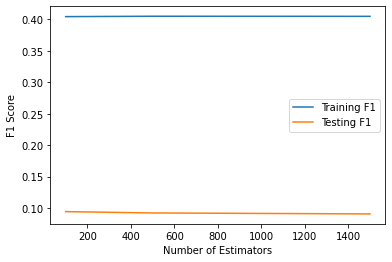

In [45]:
plt.figure()

plt.plot(scores['param_randomforestclassifier__n_estimators'],
         scores['mean_train_f1'],
         label='Training F1')
plt.plot(scores['param_randomforestclassifier__n_estimators'],
         scores['mean_test_f1'],
         label='Testing F1')

plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('F1 Score')

plt.show()

In [51]:
recall_score(y_test, rf_estimators.predict(X_test[col]))

0.20034843205574912

In [70]:
print(classification_report(y_test, rf_estimators.predict(X_test[col])))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92     13134
           1       0.07      0.20      0.10       574

    accuracy                           0.85     13708
   macro avg       0.52      0.54      0.51     13708
weighted avg       0.92      0.85      0.89     13708



In [72]:
confusion_matrix(y_test, rf_estimators.predict(X_test[col]))

array([[11590,  1544],
       [  459,   115]], dtype=int64)

In [46]:
# Min Samples Leaf

parameters = {rf_param + 'min_samples_leaf' : [1,10,100]}

rf_leaf = GridSearchCV(imba_pipeline,
                        parameters,
                        cv = n_folds,
                        scoring=scorer,
                        refit='f1',
                        return_train_score=True)
rf_leaf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smoteenn', SMOTEENN(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__min_samples_leaf': [1, 10,
                                                                      100]},
             refit='f1', return_train_score=True,
             scoring={'f1': make_scorer(f1_score)})

In [47]:
scores = pd.DataFrame(rf_leaf.cv_results_)
scores.sort_values('rank_test_f1').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__min_samples_leaf,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,...,mean_test_f1,std_test_f1,rank_test_f1,split0_train_f1,split1_train_f1,split2_train_f1,split3_train_f1,split4_train_f1,mean_train_f1,std_train_f1
2,212.149329,6.125102,0.189090,0.036421,100,{'randomforestclassifier__min_samples_leaf': 100},0.116551,0.112935,0.125000,0.117380,...,0.116043,0.005498,1,0.122609,0.125941,0.122129,0.121989,0.123399,0.123213,0.001450
1,213.387303,18.265765,0.256108,0.044312,10,{'randomforestclassifier__min_samples_leaf': 10},0.103267,0.108567,0.113902,0.108129,...,0.106741,0.004822,2,0.173303,0.169271,0.164757,0.164701,0.171279,0.168662,0.003455
0,213.744212,13.457045,0.344879,0.054690,1,{'randomforestclassifier__min_samples_leaf': 1},0.086750,0.085441,0.103711,0.087326,...,0.088703,0.007905,3,0.409064,0.391642,0.384437,0.423181,0.405890,0.402843,0.013608


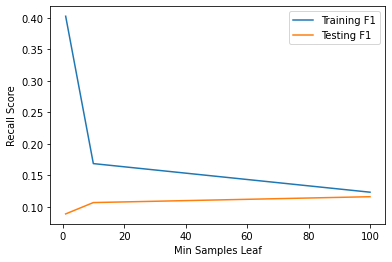

In [48]:
plt.figure()

plt.plot(scores['param_randomforestclassifier__min_samples_leaf'],
         scores['mean_train_f1'],
         label='Training F1')
plt.plot(scores['param_randomforestclassifier__min_samples_leaf'],
         scores['mean_test_f1'],
         label='Testing F1')

plt.legend()
plt.xlabel('Min Samples Leaf')
plt.ylabel('Recall Score')

plt.show()

In [52]:
recall_score(y_test, rf_leaf.predict(X_test[col]))

0.5940766550522648

In [54]:
print(classification_report(y_test, rf_leaf.predict(X_test[col])))

              precision    recall  f1-score   support

           0       0.97      0.65      0.78     13134
           1       0.07      0.59      0.12       574

    accuracy                           0.65     13708
   macro avg       0.52      0.62      0.45     13708
weighted avg       0.94      0.65      0.75     13708



In [55]:
confusion_matrix(y_test, rf_leaf.predict(X_test[col]))

array([[8506, 4628],
       [ 233,  341]], dtype=int64)

In [75]:
# Min Samples split

parameters = {rf_param + 'min_samples_split' : [100,200,300]}

rf = GridSearchCV(imba_pipeline,
                        parameters,
                        cv = n_folds,
                        scoring='recall',
                        #refit='recall',
                        return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smoteenn', SMOTEENN(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__min_samples_split': [100, 200,
                                                                       300]},
             return_train_score=True, scoring='recall')

In [79]:
scores = pd.DataFrame(rf.cv_results_)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,288.938253,72.521647,0.309344,0.093142,100,{'randomforestclassifier__min_samples_split': ...,0.276458,0.312500,0.364224,0.267819,...,0.301220,0.034887,3,0.393204,0.409066,0.419860,0.381338,0.396980,0.400089,0.013268
1,355.591323,43.346082,0.388161,0.155944,200,{'randomforestclassifier__min_samples_split': ...,0.341253,0.377155,0.409483,0.336933,...,0.357328,0.031777,2,0.409385,0.440907,0.433891,0.392665,0.403452,0.416060,0.018364
2,247.614086,75.327680,0.190403,0.065072,300,{'randomforestclassifier__min_samples_split': ...,0.371490,0.398707,0.474138,0.369330,...,0.393143,0.043164,1,0.435814,0.457636,0.472747,0.423409,0.428803,0.443682,0.018621


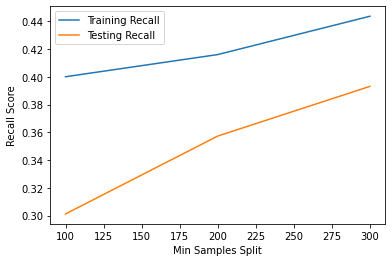

In [80]:
plt.figure()

plt.plot(scores['param_randomforestclassifier__min_samples_split'],
         scores['mean_train_score'],
         label='Training Recall')
plt.plot(scores['param_randomforestclassifier__min_samples_split'],
         scores['mean_test_score'],
         label='Testing Recall')

plt.legend()
plt.xlabel('Min Samples Split')
plt.ylabel('Recall Score')

plt.show()

In [81]:
y_pred = rf.predict(X_test[col])

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.75      0.84     13134
           1       0.07      0.41      0.11       574

    accuracy                           0.73     13708
   macro avg       0.52      0.58      0.48     13708
weighted avg       0.93      0.73      0.81     13708



In [83]:
confusion_matrix(y_test, y_pred)

array([[9805, 3329],
       [ 340,  234]], dtype=int64)